# Como Graficar Vectores de mas de 3 Dimensiones

In [ ]:
!pip install -U sentence-transformers --quiet

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [4]:
#Textos a vectorizar
sentences = [
    'Italy',
    'Spain',
    'Germany',
    'France'
]

In [5]:
#Las frases son vectorizadas llamando a model.encode()
embeddings = model.encode(sentences)

In [6]:
query = "Madrid"
query_embedding = model.encode(query)

## Dibujar los vectores

### Projectar los vectores en espacios de 1, 2 o 3 dimesiones

Hay tecnicas para graficar vectores que tienen mas de 3 dimensiones, por ejemplo [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [t-sne](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold) y [UMAP](https://umap-learn.readthedocs.io/en/latest/index.html). Estas tecnicas projectan estos vectores de muchas dimensiones en espacios de menos dimensiones para poderlos graficar.

A continuacion veremos como implementar [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Ahora utilizamos PCA para projectar los vectores de 384 dimensiones a solo dos dimensiones

In [ ]:
# prompt: Utilizar pca de sklearn para hacer un plot de embeddings

from sklearn.decomposition import PCA

# Project the embeddings onto the first 2 principal components
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

In [20]:
query_2d = pca.transform([query_embedding])

Una vez que hemos reducido las dimensiones de nuestro espacio procedemos a graficar con matplotlib como siempre

In [35]:
import matplotlib.pyplot as plt

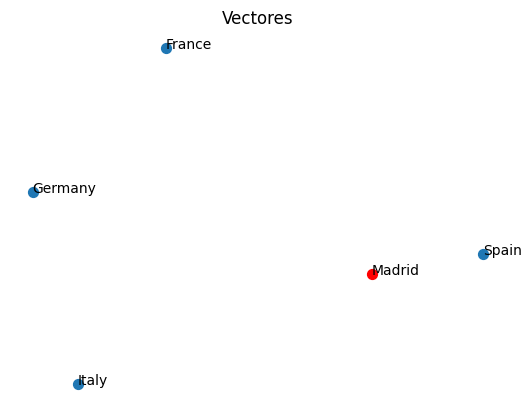

In [36]:
fig, ax = plt.subplots()
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=50)
ax.scatter(query_2d[:, 0], query_2d[:, 1], s=50, c="red")
for i in range(len(sentences)):
    ax.annotate(sentences[i], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
ax.annotate("Madrid", (query_2d[:, 0], query_2d[:, 1]))
ax.set_title('Vectores')
ax.axis('off');
plt.show()

### Utilizar de grafos para mostrar distancias entre vectores

A continuacion utilizaremos la libreria [networkx](https://networkx.org/) para graficar las distancias entre vectores como un grafo donde los nodos representan los datos (vectores) y las conecciones representan la distancia entre dichos datos.

In [37]:
distancias = []
# Calcular que vector del chat es mas similar al vector a buscar
for i in range(len(embeddings)):
    cos_sim = util.cos_sim(query_embedding, embeddings[i,:])
    distancias.append(( 1 - float(cos_sim), sentences[i]))

distancias.sort(key=lambda tup: -tup[0])
distancias

[(0.47340691089630127, 'Germany'),
 (0.45199137926101685, 'France'),
 (0.4162766933441162, 'Italy'),
 (0.25939512252807617, 'Spain')]

In [38]:
!pip install networkx -U -q

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

In [40]:
G = nx.Graph()
G.add_edge('Madrid', 'Italy', weight=0.42 )
G.add_edge('Madrid', 'Spain', weight=0.26 )
G.add_edge('Madrid', 'Germany', weight=0.47 )
G.add_edge('Madrid', 'France', weight=0.45 )

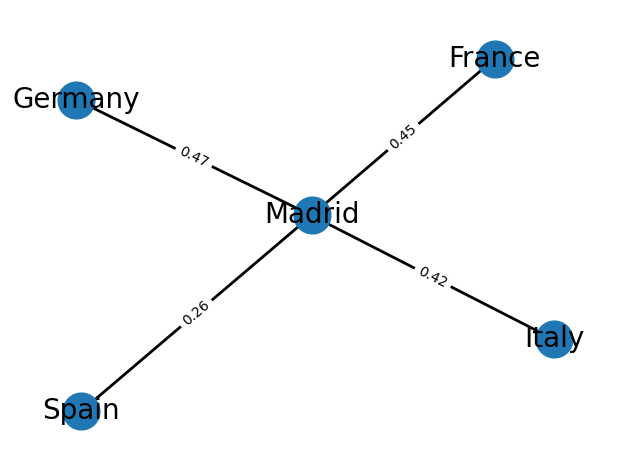

In [41]:
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2)

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show();

### Referencias:
- NetworkX:
  - [Tutorial](https://networkx.org/documentation/stable/tutorial.html)
  - [Weighted Graph](https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html)
  - [Node Position](https://networkx.org/documentation/stable/auto_examples/drawing/plot_center_node.html)

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/deeplearning/deeplearning.html)